In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
df = pd.read_csv("insurance.csv")

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [8]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [9]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

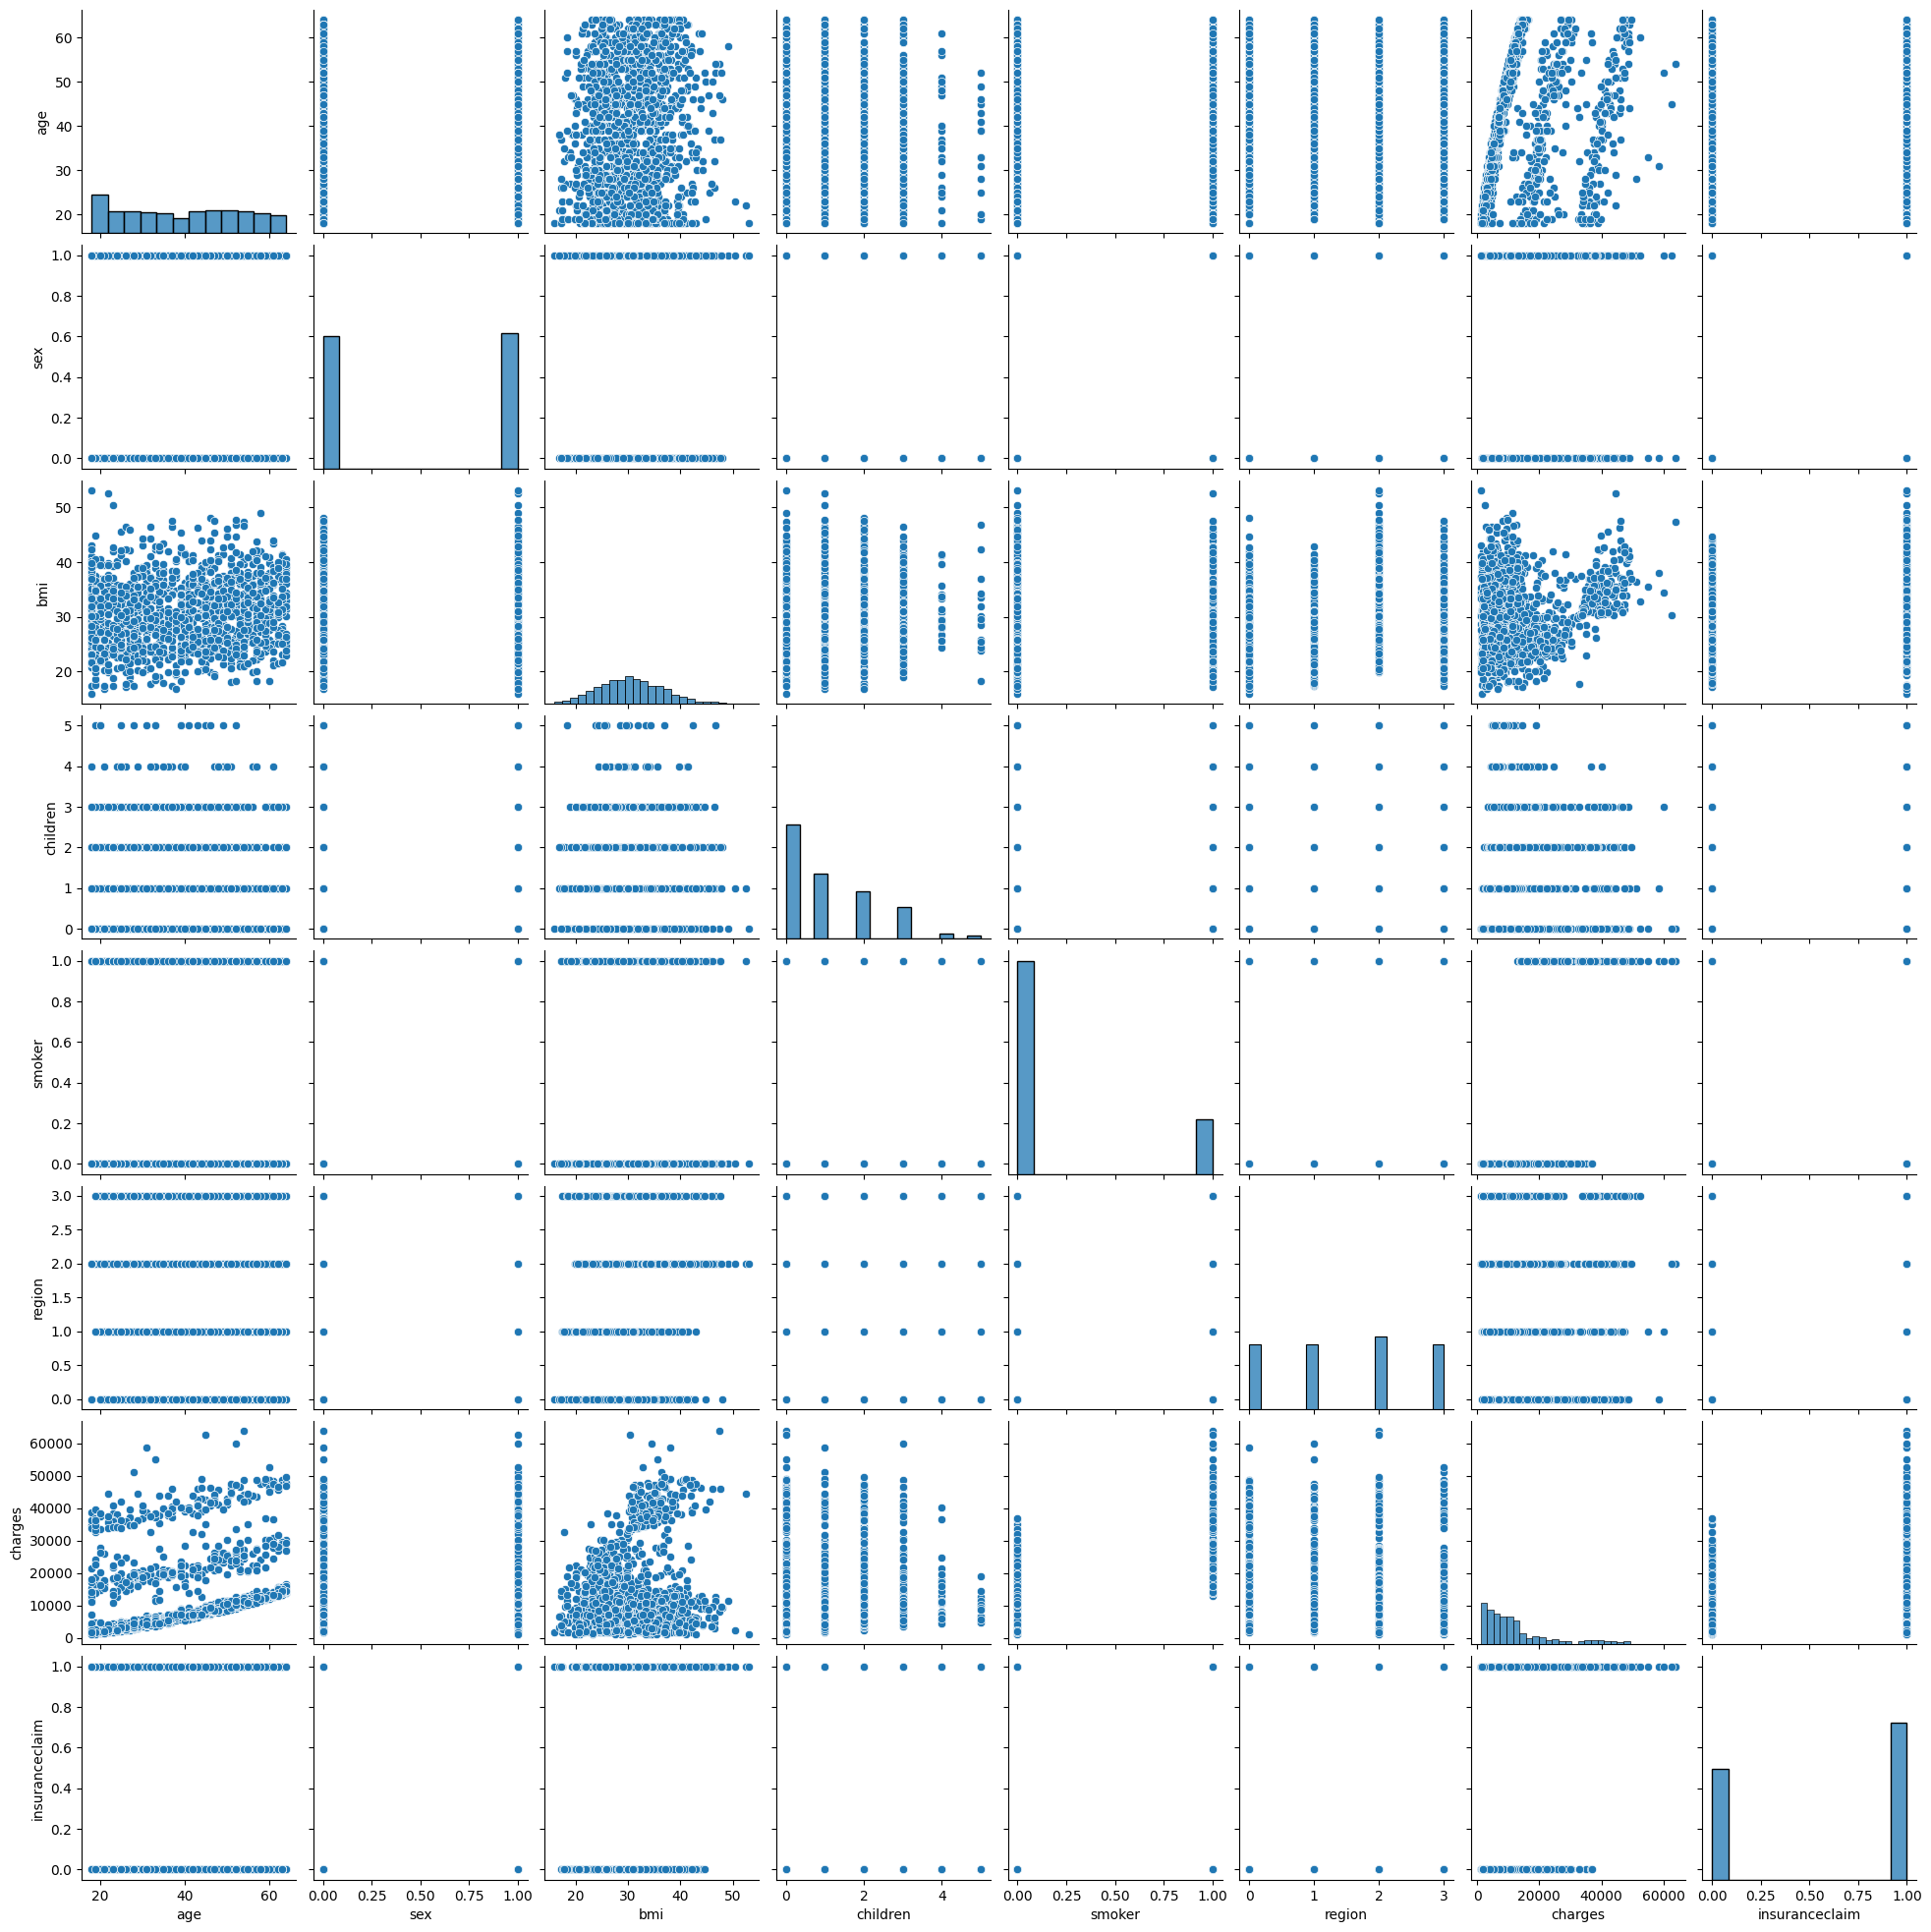

In [10]:
sns.pairplot(df)

In [11]:
df.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


In [12]:
df.corr().style.background_gradient()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


<Axes: >

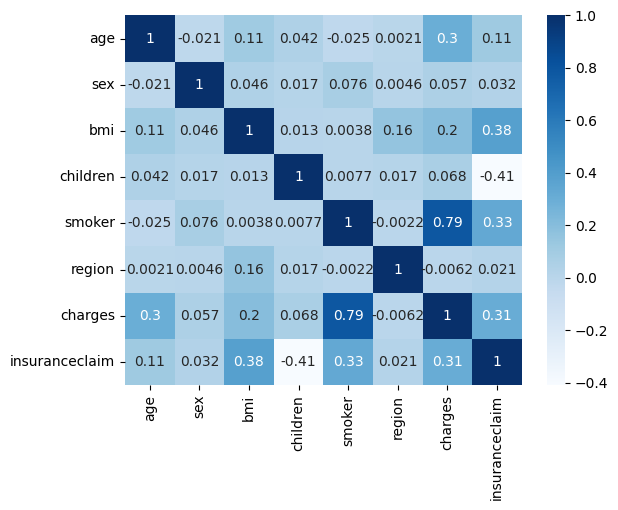

In [13]:
sns.heatmap(df.corr() , annot=True, cmap="Blues")

In [14]:
x=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [15]:
x

array([[0.00000000e+00, 2.79000000e+01, 0.00000000e+00, ...,
        3.00000000e+00, 1.68849240e+04, 1.00000000e+00],
       [1.00000000e+00, 3.37700000e+01, 1.00000000e+00, ...,
        2.00000000e+00, 1.72555230e+03, 1.00000000e+00],
       [1.00000000e+00, 3.30000000e+01, 3.00000000e+00, ...,
        2.00000000e+00, 4.44946200e+03, 0.00000000e+00],
       ...,
       [0.00000000e+00, 3.68500000e+01, 0.00000000e+00, ...,
        2.00000000e+00, 1.62983350e+03, 1.00000000e+00],
       [0.00000000e+00, 2.58000000e+01, 0.00000000e+00, ...,
        3.00000000e+00, 2.00794500e+03, 0.00000000e+00],
       [0.00000000e+00, 2.90700000e+01, 0.00000000e+00, ...,
        1.00000000e+00, 2.91413603e+04, 1.00000000e+00]])

In [29]:
y

array([19, 18, 28, ..., 18, 21, 61])

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [33]:

xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [18]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error

In [19]:
#step1: model creation
ann=Sequential()

#step2: adding input and hidden layer
ann.add(Dense(units=4,activation="relu"))
ann.add(Dense(units=4,activation="relu"))
ann.add(Dense(units=4,activation="relu"))

#step3: output layer
ann.add(Dense(units=1)) #no activation function in regression, no metric

#ste4:compile
ann.compile(optimizer="rmsprop",loss="mse")

#step 5:training
ann.fit(xtrain,ytrain,epochs=250)

#step6:prediction

Epoch 1/250
30/30 [==============================] - 1s 1ms/step - loss: 192378.2344
Epoch 2/250
30/30 [==============================] - 0s 1ms/step - loss: 79368.7500
Epoch 3/250
30/30 [==============================] - 0s 1ms/step - loss: 32454.2949
Epoch 4/250
30/30 [==============================] - 0s 1ms/step - loss: 11829.5225
Epoch 5/250
30/30 [==============================] - 0s 1ms/step - loss: 4068.7585
Epoch 6/250
30/30 [==============================] - 0s 1ms/step - loss: 1493.7501
Epoch 7/250
30/30 [==============================] - 0s 1ms/step - loss: 736.9006
Epoch 8/250
30/30 [==============================] - 0s 1ms/step - loss: 707.2764
Epoch 9/250
30/30 [==============================] - 0s 2ms/step - loss: 704.3297
Epoch 10/250
30/30 [==============================] - 0s 1ms/step - loss: 700.4194
Epoch 11/250
30/30 [==============================] - 0s 1ms/step - loss: 703.1369
Epoch 12/250
30/30 [==============================] - 0s 1ms/step - loss: 688.0134
Ep

In [20]:
loss=pd.DataFrame(ann.history.history)
loss.head()

,loss
0,192378.234375
1,79368.750000
2,32454.294922
3,11829.522461
4,4068.758545


In [21]:
loss.tail

<bound method NDFrame.tail of               loss
0    192378.234375
1     79368.750000
2     32454.294922
3     11829.522461
4      4068.758545
..             ...
245     150.155609
246     148.609695
247     147.970230
248     146.885727
249     147.187134

[250 rows x 1 columns]>

<Axes: >

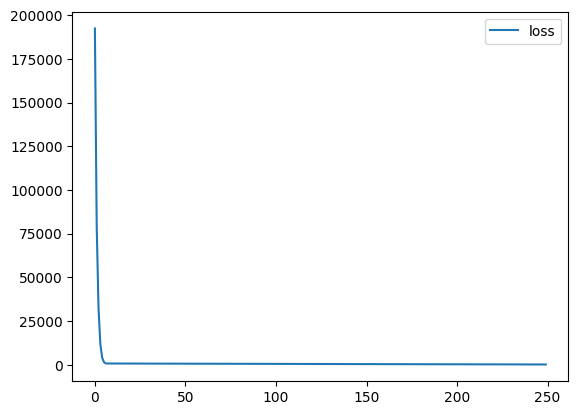

In [22]:
loss.plot()

In [23]:
#model.score(xtrain,ytrain)
#in ann we use evaluate

ann.evaluate(xtrain,ytrain)
ann.evaluate(xtest,ytest)

13/13 [==============================] - 0s 1ms/step - loss: 156.2581


156.2581329345703

In [24]:
ypred=ann.predict(xtest)

13/13 [==============================] - 0s 1ms/step


In [25]:
dic={"Actual Y":ytest,"Predicted y":ypred.flatten()}
df1=pd.DataFrame(dic)

<Axes: xlabel='Actual Y', ylabel='Predicted y'>

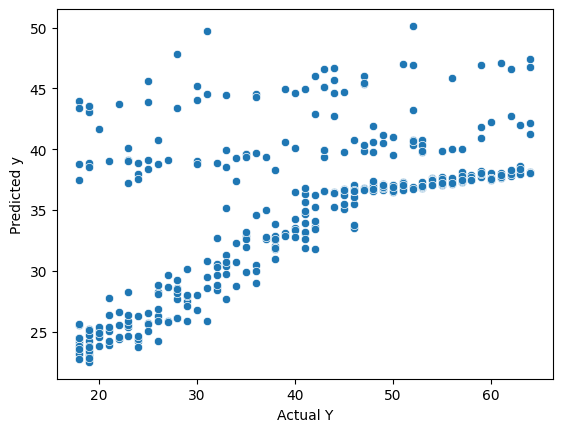

In [26]:
sns.scatterplot(x="Actual Y",y="Predicted y",data=df1)

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
print(f"MSE={mean_squared_error(ytest,ypred)}")
print(f"RMSE={np.sqrt(mean_squared_error(ytest,ypred))}")

MSE=156.25812929193233
RMSE=12.500325167447938
